In [1]:
import matplotlib.pyplot as plt
import os
from os.path import exists

from lab3_tools import *
from lab3_proto import words2phones
from lab1_proto import *
from lab2_tools import *
from lab2_proto import *

# 3) Data

In [2]:
# Get whole dataset from AFS

In [3]:
path2info('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

('man', 'ae', 'z9z6531', 'a')

In [4]:
loadAudio('tidigits/disc_4.1.1/tidigits/train/man/ae/z9z6531a.wav')

(array([11, 13, 11, ...,  9,  9,  9], dtype=int16), 20000)

# 4) Preparing the Data for DNN Training

In [5]:
lab2_models = '../lab2/lab2_models_all.npz'
phoneHMMs = np.load(lab2_models, allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
stateList

['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

In [6]:
stateList.index('ay_2')

8

In [7]:
target_class_file_name = "targetClass.txt"
if exists(target_class_file_name):
    print(f"{target_class_file_name} exists, skipping its creation.")
else:
    with open(target_class_file_name, "w") as txt_file:
        for entry in stateList:
            txt_file.write(f"{entry}\n")

targetClass.txt exists, skipping its creation.


In [8]:
# Checking a file content
!cat targetClass.txt

ah_0
ah_1
ah_2
ao_0
ao_1
ao_2
ay_0
ay_1
ay_2
eh_0
eh_1
eh_2
ey_0
ey_1
ey_2
f_0
f_1
f_2
ih_0
ih_1
ih_2
iy_0
iy_1
iy_2
k_0
k_1
k_2
n_0
n_1
n_2
ow_0
ow_1
ow_2
r_0
r_1
r_2
s_0
s_1
s_2
sil_0
sil_1
sil_2
sp_0
t_0
t_1
t_2
th_0
th_1
th_2
uw_0
uw_1
uw_2
v_0
v_1
v_2
w_0
w_1
w_2
z_0
z_1
z_2


## Forced alignment of single sample

In [9]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(filename)
lmfcc = mfcc(samples)
lmfcc

array([[ -22.91392389, -189.9582419 ,    7.40105799, ..., -112.7883752 ,
          41.12045179,  -12.04285405],
       [  -6.81710936, -187.14843532,  -24.39690243, ...,  -94.4723144 ,
        -198.74795293, -127.98350389],
       [ -11.92109946, -204.41816753,  -53.65419198, ...,  -95.38523624,
         -14.04657624,  -66.81715806],
       ...,
       [ 154.81267871,   41.12510125,  -11.03644377, ..., -251.4617779 ,
         -86.72418937,  159.01415406],
       [ 163.1202934 ,   15.30942337,  -15.99373122, ...,  -38.20996944,
         -78.60225893,  233.63308676],
       [ 143.95962157,    4.19763652,  -38.44629773, ...,  -57.65568221,
          23.2052515 ,  225.60552906]])

In [10]:
steps = np.load("lab3_example.npz", allow_pickle=True)['example'].item()

In [11]:
np.sum(lmfcc - steps['lmfcc'])

7.61258764359063e-12

In [12]:
wordTrans = list(path2info(filename)[2])
wordTrans

['z', '4', '3']

In [13]:
# Get the phoneme transcription of a sequence of words
from prondict import prondict
phoneTrans = words2phones(wordTrans, prondict)
phoneTrans

['sil',
 'z',
 'iy',
 'r',
 'ow',
 'sp',
 'f',
 'ao',
 'r',
 'sp',
 'th',
 'r',
 'iy',
 'sp',
 'sil']

In [14]:
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
utteranceHMM

{'name': 'sil+z+iy+r+ow+sp+f+ao+r+sp+th+r+iy+sp+sil',
 'startprob': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]),
 'transmat': array([[0.8833106 , 0.1166894 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.9164465 , 0.08355348, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.802877  , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.9164465 , 0.08355348,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.802877  ,
         0.197123  ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 'means': array([[ 1.929856e+02, -1.658209e+01, -2.290160e+01,  3.132330e+01,
          4.658450e+01, -1.151792e+00,  1.339505e+01,  6.989146e+0

In [15]:
# Splitting phonemes (in our case) into three components, execept short pause (sp) which has just one
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
stateTrans

['sil_0',
 'sil_1',
 'sil_2',
 'z_0',
 'z_1',
 'z_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'sp_0',
 'f_0',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'r_0',
 'r_1',
 'r_2',
 'sp_0',
 'th_0',
 'th_1',
 'th_2',
 'r_0',
 'r_1',
 'r_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'sp_0',
 'sil_0',
 'sil_1',
 'sil_2']

In [16]:
obsloglik = log_multivariate_normal_density_diag(
    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
)
obsloglik

array([[-82.85615934, -77.77520492, -78.78912809, ..., -82.85615934,
        -77.77520492, -78.78912809],
       [-82.64629092, -75.68935466, -78.4682569 , ..., -82.64629092,
        -75.68935466, -78.4682569 ],
       [-81.28144137, -74.7891467 , -76.77156599, ..., -81.28144137,
        -74.7891467 , -76.77156599],
       ...,
       [-78.94201025, -88.97211724, -80.73016898, ..., -78.94201025,
        -88.97211724, -80.73016898],
       [-77.97751766, -86.49199766, -79.0998656 , ..., -77.97751766,
        -86.49199766, -79.0998656 ],
       [-76.34772424, -81.64468937, -77.4851362 , ..., -76.34772424,
        -81.64468937, -77.4851362 ]])

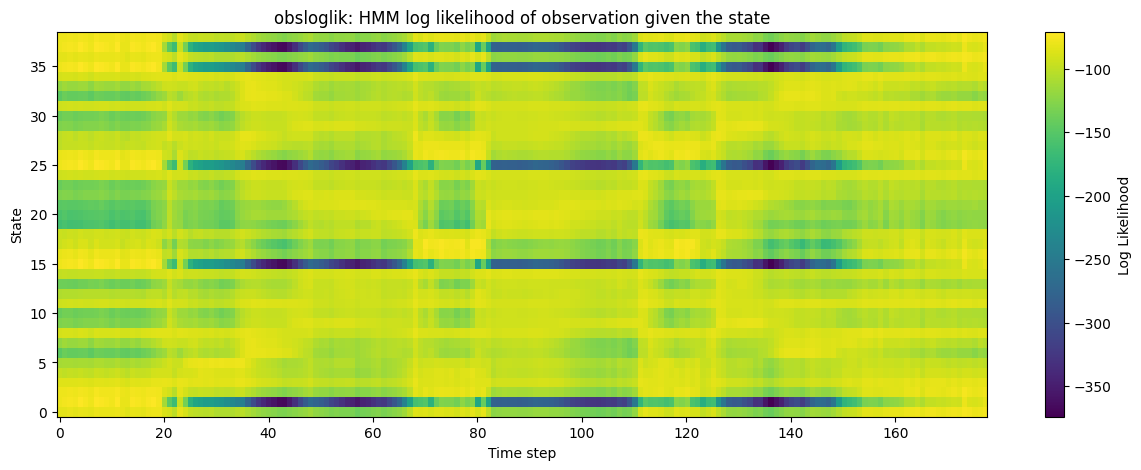

In [17]:
# 5 bars - silence, 3x short silence, silence
# which we expect
plt.figure(figsize=(15, 5))
plt.imshow(obsloglik.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(label='Log Likelihood')
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('obsloglik: HMM log likelihood of observation given the state')
plt.show()

In [18]:
startprob = utteranceHMM['startprob']
transmat = utteranceHMM['transmat']

viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_14004/687773586.py:4: RuntimeWarning: divide by zero encountered in log
  viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))


In [19]:
logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))

/tmp/ipykernel_14004/582359088.py:1: RuntimeWarning: divide by zero encountered in log
  logalpha = forward(obsloglik, np.log(startprob), np.log(transmat))


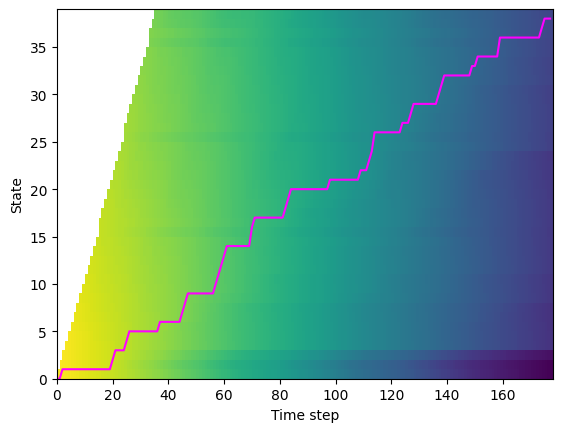

In [20]:
plt.pcolormesh(logalpha.T)
plt.plot(viterbi_path.T, color="magenta")
plt.xlabel('Time step')
plt.ylabel('State')
plt.show()

In [21]:
viterbiStateTrans = [stateTrans[i] for i in viterbi_path]
viterbiStateTrans

['sil_0',
 'sil_0',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_2',
 'z_0',
 'z_0',
 'z_0',
 'z_0',
 'z_1',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'f_0',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',

In [22]:
frames2trans(viterbiStateTrans, outfilename='z43a.lab')

'0 0.02 sil_0\n0.02 0.20000000000000004 sil_1\n0.20000000000000004 0.21000000000000005 sil_2\n0.21000000000000005 0.25000000000000006 z_0\n0.25000000000000006 0.26000000000000006 z_1\n0.26000000000000006 0.37000000000000016 z_2\n0.37000000000000016 0.45000000000000023 iy_0\n0.45000000000000023 0.46000000000000024 iy_1\n0.46000000000000024 0.47000000000000025 iy_2\n0.47000000000000025 0.5700000000000003 r_0\n0.5700000000000003 0.5800000000000003 r_1\n0.5800000000000003 0.5900000000000003 r_2\n0.5900000000000003 0.6000000000000003 ow_0\n0.6000000000000003 0.6100000000000003 ow_1\n0.6100000000000003 0.7000000000000004 ow_2\n0.7000000000000004 0.7100000000000004 f_0\n0.7100000000000004 0.8200000000000005 f_1\n0.8200000000000005 0.8300000000000005 f_2\n0.8300000000000005 0.8400000000000005 ao_0\n0.8400000000000005 0.9800000000000006 ao_1\n0.9800000000000006 1.0900000000000007 ao_2\n1.0900000000000007 1.1200000000000008 r_0\n1.1200000000000008 1.1300000000000008 r_1\n1.1300000000000008 1.140

Is the alignment correct? 
- Yes.

What can you say observing the alignment between the sound file and the classes?
- It fits?

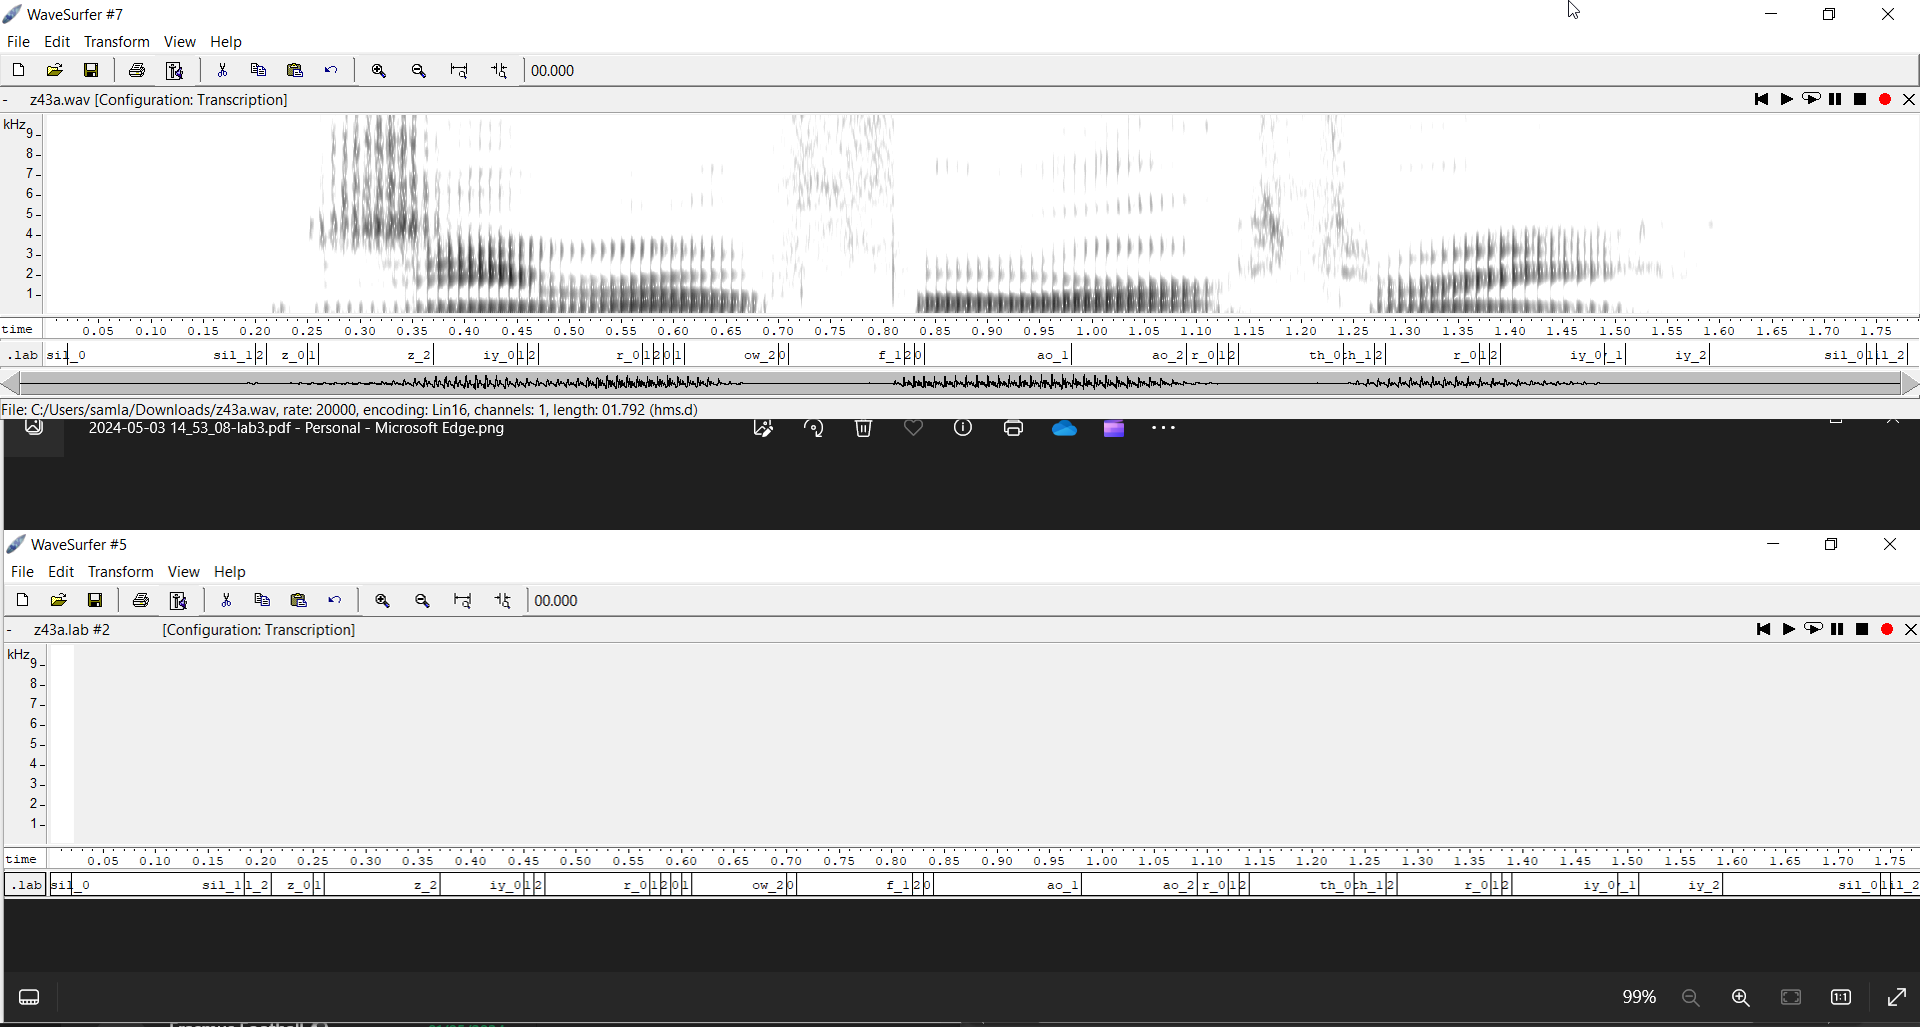

## Feature extraction, forced alignment of datasets

In [23]:
test_file_name = 'traindata.npz'
if exists(test_file_name):
        print(f"{test_file_name} exists, skipping its creation.")
else:
    traindata = []
    for root, dirs, files in os.walk('tidigits/disc_4.1.1/tidigits/train'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)
                
                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)
    
                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]
                
                traindata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(test_file_name, traindata=traindata)

traindata.npz exists, skipping its creation.


In [24]:
file_name = 'testdata.npz'
if exists(file_name):
        print(f"{file_name} exists, skipping its creation.")
else:
    testdata = []
    for root, dirs, files in os.walk('tidigits/disc_4.2.1/tidigits/test'):
        for file in files:
            if file.endswith('.wav'):
                filename = os.path.join(root, file)
                samples, samplingrate = loadAudio(filename)
                
                # Feature extraction
                lmfcc = mfcc(samples)
                mspec_1 = mspec(samples)
    
                # Forced alignment
                wordTrans = list(path2info(filename)[2])
                phoneTrans = words2phones(wordTrans, prondict)
                utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)
                stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])]
                # Emission likelihoods
                obsloglik = log_multivariate_normal_density_diag(
                    lmfcc, utteranceHMM['means'], utteranceHMM['covars']
                )
                # Viterbi
                startprob = utteranceHMM['startprob']
                transmat = utteranceHMM['transmat']
                viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(startprob), np.log(transmat))
                # Final targets
                targets = [stateList.index(stateTrans[i]) for i in viterbi_path]
                
                testdata.append({'filename': filename, 'lmfcc': lmfcc, 'mspec': mspec_1, 'targets': targets})
    np.savez(file_name, testdata=testdata)

testdata.npz exists, skipping its creation.


## 4.4 Training and validation sets

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

training_data = np.load(test_file_name, allow_pickle=True)['traindata']

genders = [path2info(training_entry['filename'])[0] for training_entry in training_data]

# We want to generate just a single split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(training_data, genders):
    training_set = np.array([training_data[i] for i in train_index])
    validation_set = np.array([training_data[i] for i in test_index])

# Validate the split size
print("Training set size: ", training_set.shape[0]/training_data.shape[0])
print("Validation set size: ", validation_set.shape[0]/training_data.shape[0])

# Validate the gender distribution
training_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in training_set])
validation_set_man_genders = np.sum([path2info(entry['filename'])[0] == 'man' for entry in validation_set])

print("Training set 'man' ratio: ", training_set_man_genders/training_set.shape[0])
print("Validation set 'man' ratio: ", validation_set_man_genders/validation_set.shape[0])

Training set size:  0.8999188217557694
Validation set size:  0.10008117824423055
Training set 'man' ratio:  0.4911082474226804
Validation set 'man' ratio:  0.49130938586326767


Explain how you selected the two data sets.


## 4.5 Acoustic Context (Dynamic Features)